<a href="https://colab.research.google.com/github/nikhiljedhe/DS_Python_machine-learning/blob/main/CARS24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
cars_df=pd.read_csv("cars24_20221210.csv")

Load the dataset into dataframe called cars_df

In [3]:
cars_df

,name,make,model,city,year,fueltype,kilometerdriven,ownernumber,transmission,bodytype,storename,isc24assured,registrationcity,registrationstate,benefits,discountprice,price,url,createdDate
0,Hyundai Elite i20,Hyundai,Elite I20,Kochi,2017,Petrol,35939,2,Manual,Hatchback,Kochi-Pns,False,Kozhikode,Kerala,13898,47399,607000,https://www.cars24.com/buy-used-hyundai-elite-...,2022-03-24
1,Maruti Alto 800,Maruti,Alto 800,Mumbai,2016,Petrol + Cng,6180,1,Manual,Hatchback,Hi-West Mumbai,False,Mumbai,Maharashtra,12542,2099,326000,https://www.cars24.com/buy-used-maruti-alto-80...,2022-11-09
2,Maruti Dzire,Maruti,Dzire,Lucknow,2019,Petrol + Cng,46808,1,Manual,Sedan,Vibhuti Khand - Gomti Nagar,False,Lucknow,Uttar Pradesh,13898,26000,640000,https://www.cars24.com/buy-used-maruti-dzire-2...,2022-09-30
3,KIA SELTOS,Kia,Seltos,Bangalore,2020,Diesel,26045,1,Manual,SUV,Bengaluru-Pns,False,Bengaluru,Karnataka,9688,143700,1354000,https://www.cars24.com/buy-used-kia-seltos-202...,2022-07-04
4,Maruti Ertiga,Maruti,Ertiga,Kolkata,2017,Petrol,53056,1,Manual,SUV,Hi-Kolkata,False,Barrackpore,West Bengal,13898,22800,676000,https://www.cars24.com/buy-used-maruti-ertiga-...,2022-10-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6432,Mahindra XUV500,Mahindra,Xuv500,Hyderabad,2013,Diesel,74570,2,Manual,SUV,Hi-West Hyd,False,Hyderabad,Telangana,9688,0,744000,https://www.cars24.com/buy-used-mahindra-xuv50...,2022-12-09
6433,Renault Kwid,Renault,Kwid,Chandigarh,2017,Petrol,39981,2,Manual,Hatchback,Chandigarh-Pns,False,Faridabad,Haryana,12542,0,248000,https://www.cars24.com/buy-used-renault-kwid-2...,2022-12-10
6434,Hyundai i10,Hyundai,I10,Hyderabad,2014,Petrol,61249,1,Manual,Hatchback,Hi-West 2 Hyd,False,Hyderabad,Telangana,13898,0,351000,https://www.cars24.com/buy-used-hyundai-i10-20...,2022-12-10
6435,Maruti Swift Dzire,Maruti,Swift Dzire,Hyderabad,2014,Petrol,48081,1,Manual,Sedan,Hi-West 2 Hyd,False,Hyderabad,Telangana,13898,0,494000,https://www.cars24.com/buy-used-maruti-swift-d...,2022-12-10


In [4]:
cars_df.shape

(6437, 19)

This dataset contains 6437 total rows and 19 columns where price column is Response variable as y variable is continuous numeric then this problem is **Regression Problem**

# Basic Info

In [5]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6437 entries, 0 to 6436
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               6437 non-null   object
 1   make               6437 non-null   object
 2   model              6437 non-null   object
 3   city               6437 non-null   object
 4   year               6437 non-null   int64 
 5   fueltype           6437 non-null   object
 6   kilometerdriven    6437 non-null   int64 
 7   ownernumber        6437 non-null   int64 
 8   transmission       6061 non-null   object
 9   bodytype           6062 non-null   object
 10  storename          6437 non-null   object
 11  isc24assured       6437 non-null   bool  
 12  registrationcity   6437 non-null   object
 13  registrationstate  6437 non-null   object
 14  benefits           6437 non-null   int64 
 15  discountprice      6437 non-null   int64 
 16  price              6437 non-null   int64 


This dataset contains mix type of data Categorical and numeric There are some missing values are also present in transmission and bodytype column as these are categorical we replaced the missing values with mode of that column


In [6]:
cars_df.describe()

,year,kilometerdriven,ownernumber,benefits,discountprice,price
count,6437.000000,6437.000000,6437.000000,6437.000000,6437.000000,6.437000e+03
mean,2017.636166,41568.066335,1.235669,12079.200559,23500.592512,6.781378e+05
std,2.656825,26187.115364,0.454501,2458.162316,41579.296564,3.450395e+05
min,2008.000000,64.000000,1.000000,9688.000000,-155500.000000,1.340000e+05
25%,2016.000000,20580.000000,1.000000,9688.000000,-100.000000,4.390000e+05
50%,2018.000000,38177.000000,1.000000,12542.000000,10600.000000,5.880000e+05
75%,2020.000000,59333.000000,1.000000,13898.000000,37000.000000,8.290000e+05
max,2022.000000,455601.000000,3.000000,19407.000000,388300.000000,3.048000e+06


In [7]:
cars_df.columns

Index(['name', 'make', 'model', 'city', 'year', 'fueltype', 'kilometerdriven',
       'ownernumber', 'transmission', 'bodytype', 'storename', 'isc24assured',
       'registrationcity', 'registrationstate', 'benefits', 'discountprice',
       'price', 'url', 'createdDate'],
      dtype='object')

# Handling Missing values


In [8]:
cars_df.isnull().sum()

,0
name,0
make,0
model,0
city,0
year,0
fueltype,0
kilometerdriven,0
ownernumber,0
transmission,376
bodytype,375


In [9]:
cars_df["transmission"] = cars_df["transmission"].fillna(cars_df["transmission"].mode()[0])
cars_df["bodytype"]=cars_df["bodytype"].fillna(cars_df["bodytype"].mode()[0])

# Duplicate Records


In [10]:
Duplicate=cars_df.duplicated().sum()
print(Duplicate)

15


In [11]:
# Removing duplicates
cars_df = cars_df.drop_duplicates()

In [12]:
cars_df.shape

(6422, 19)

In [13]:
cars_df.isnull().sum()

,0
name,0
make,0
model,0
city,0
year,0
fueltype,0
kilometerdriven,0
ownernumber,0
transmission,0
bodytype,0


In [14]:
print(cars_df["make"].value_counts())

make
Maruti           2584
Hyundai          1689
Honda             533
Renault           291
Tata              290
Ford              200
Mahindra          179
Volkswagen        141
Kia               124
Toyota            124
Skoda              73
Mg                 56
Datsun             48
Jeep               42
Nissan             36
Audi                3
Mercedes Benz       3
Bmw                 3
Fiat                2
Jaguar              1
Name: count, dtype: int64


In [15]:
print(cars_df["model"].value_counts())

model
Grand I10      369
Swift          311
Baleno         300
Wagon R 1.0    290
Elite I20      289
              ... 
5 Series         1
Figo             1
X3               1
A6               1
Sunny            1
Name: count, Length: 134, dtype: int64


In [16]:
print(cars_df["year"].value_counts())

year
2018    1029
2019     993
2017     842
2020     774
2021     688
2016     571
2015     390
2014     376
2013     238
2022     226
2012     145
2011      87
2010      53
2009       9
2008       1
Name: count, dtype: int64


In [17]:
print(cars_df["transmission"].value_counts())

transmission
Manual       5368
Automatic    1054
Name: count, dtype: int64


In [18]:
print(cars_df["bodytype"].value_counts())

bodytype
Hatchback       3952
SUV             1311
Sedan           1046
Luxury SUV        58
Luxury Sedan      54
SEDAN              1
Name: count, dtype: int64


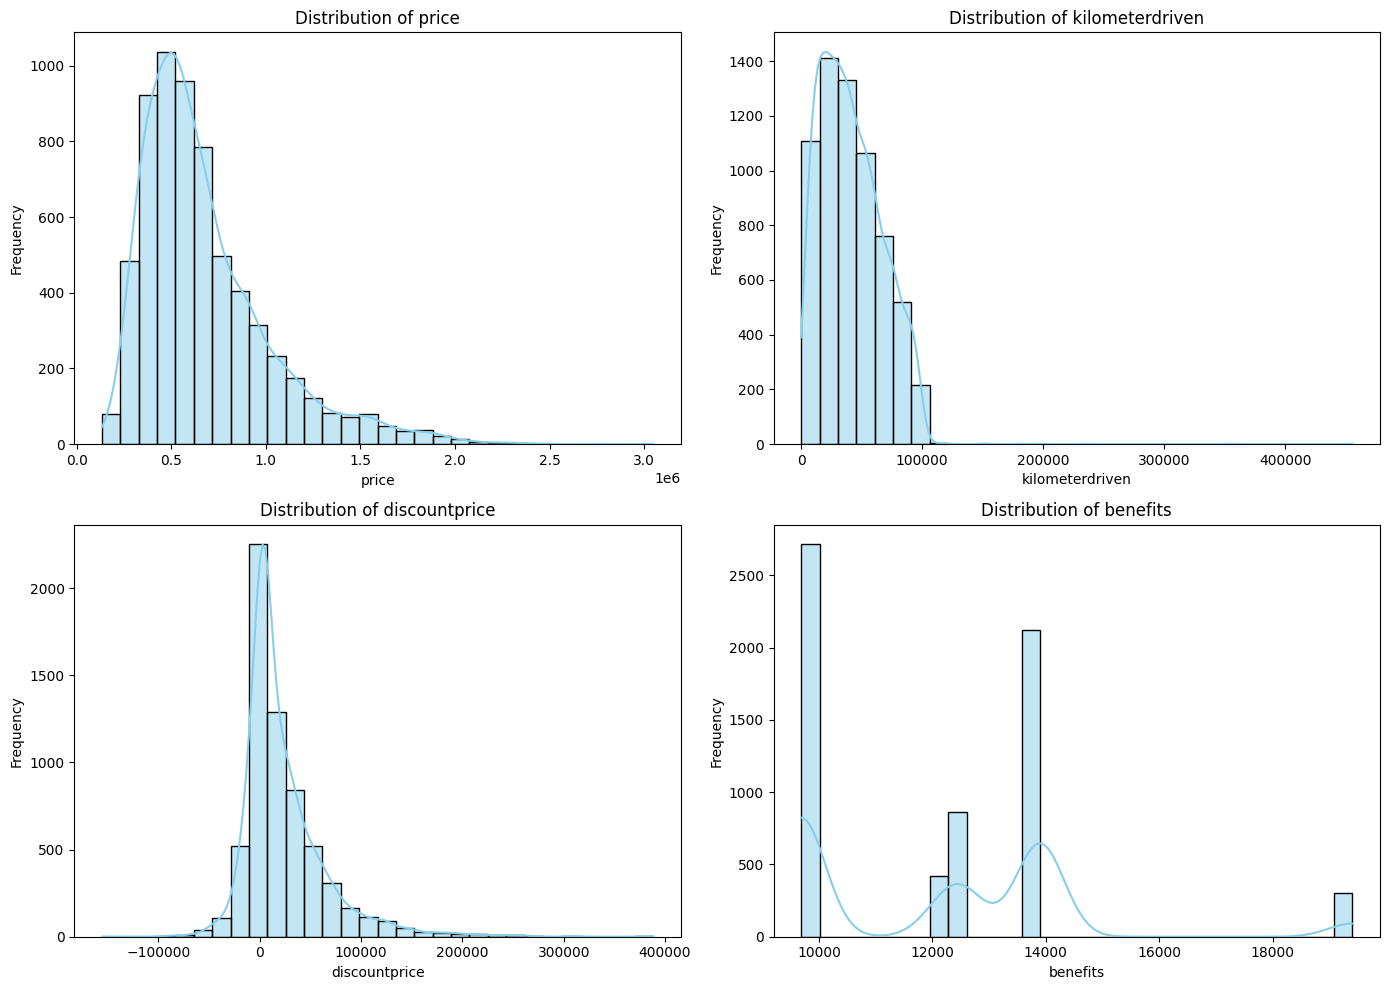

In [19]:
numeric_cols = ['price', 'kilometerdriven', 'discountprice', 'benefits']

plt.figure(figsize=(14, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(cars_df[col], kde=True, color='skyblue', bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

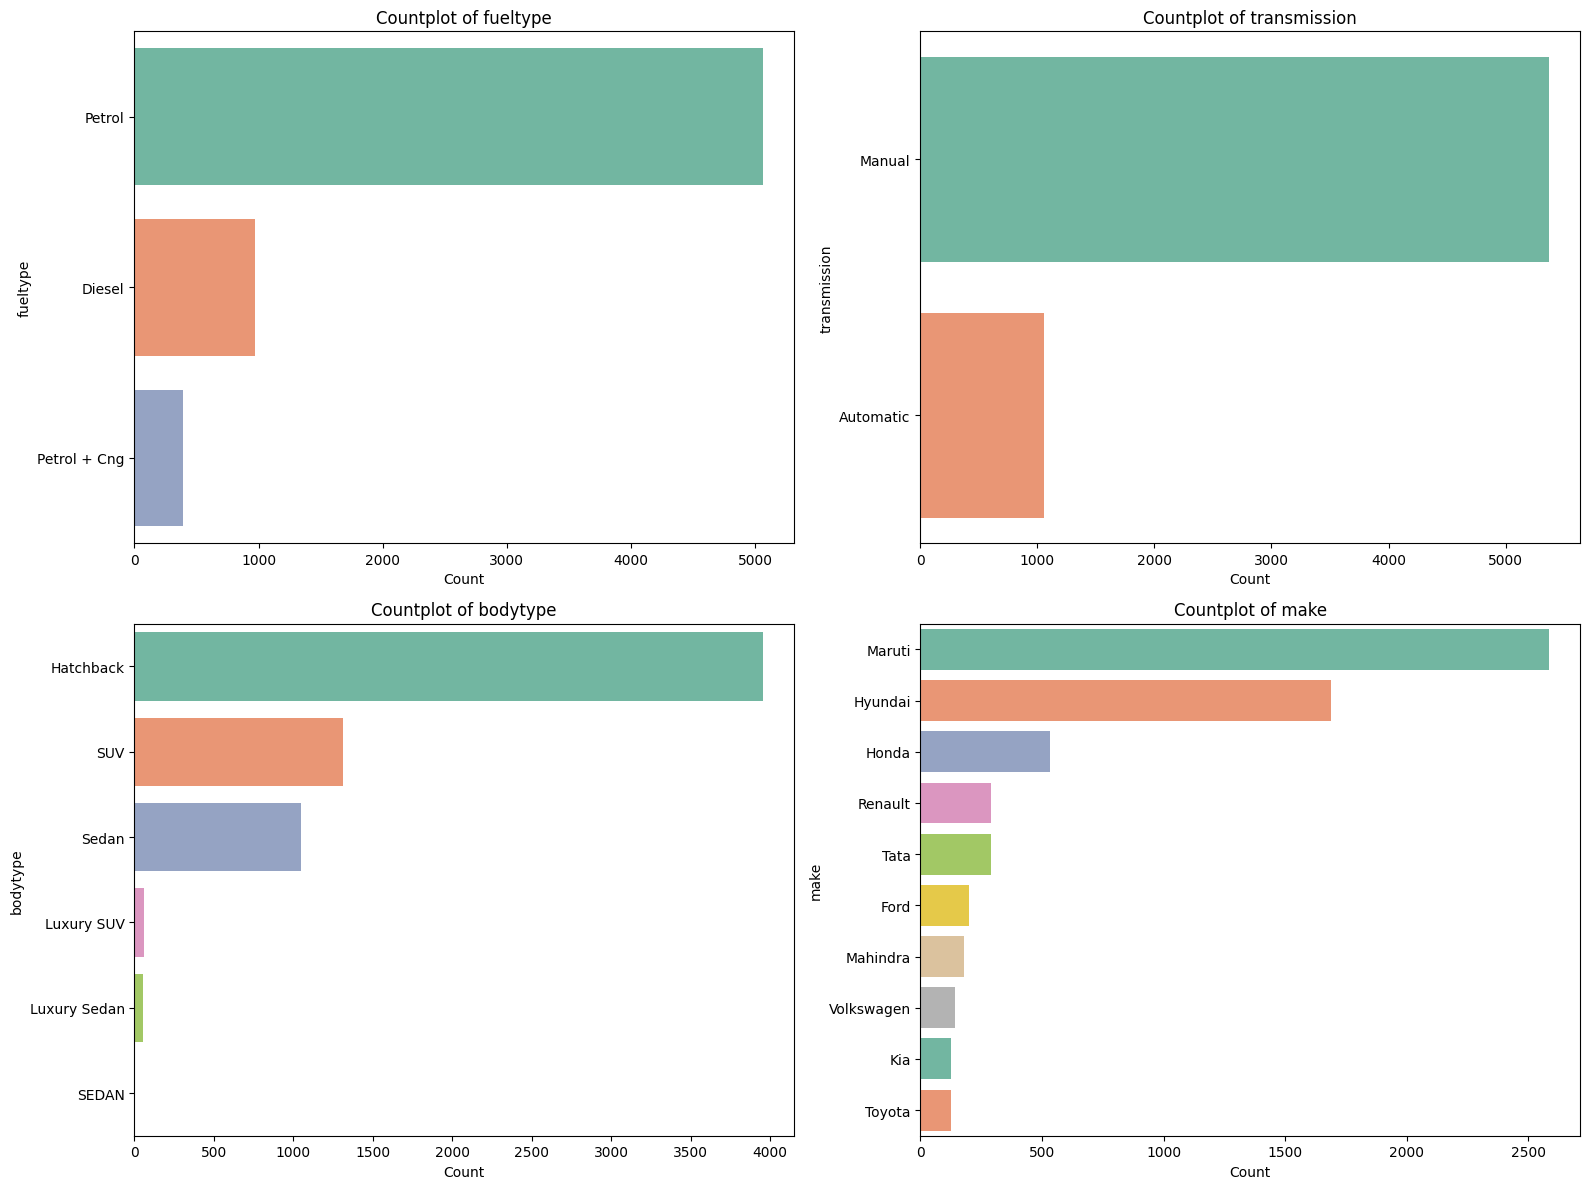

In [20]:
categorical_cols = ['fueltype', 'transmission', 'bodytype', 'make']

plt.figure(figsize=(16, 12))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 2, i)
    order = cars_df[col].value_counts().index[:10]  # Show top 10 only
    sns.countplot(data= cars_df, y=col, order=order, palette='Set2')
    plt.title(f'Countplot of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

# Feature Engineering

Derived new Feature From Existing

In [21]:
cars_df["createdDate"] = pd.to_datetime(cars_df["createdDate"], errors='coerce')
cars_df["car_age"] = cars_df["createdDate"].dt.year - cars_df["year"]

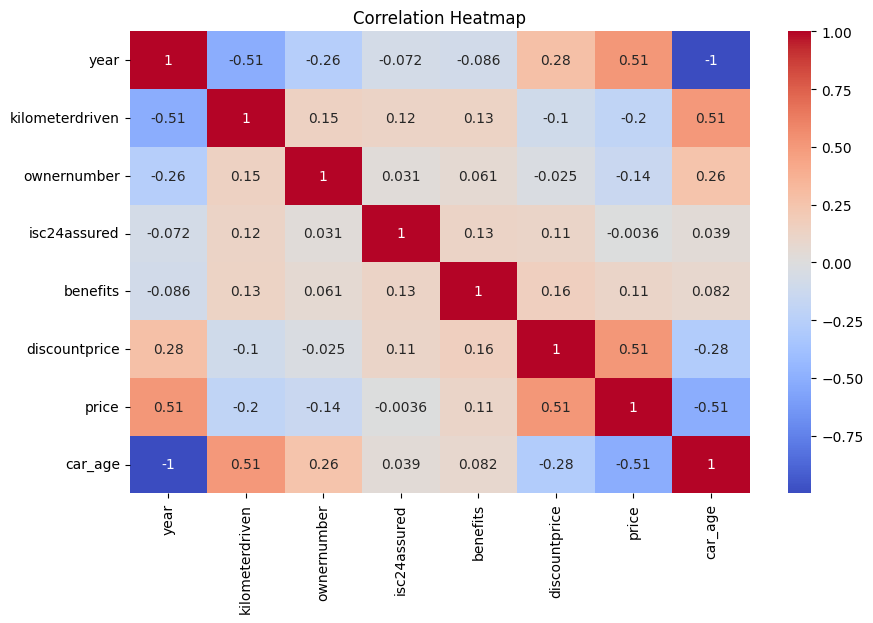

In [22]:
plt.figure(figsize=(10, 6))
sns.heatmap(cars_df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Data Visualization

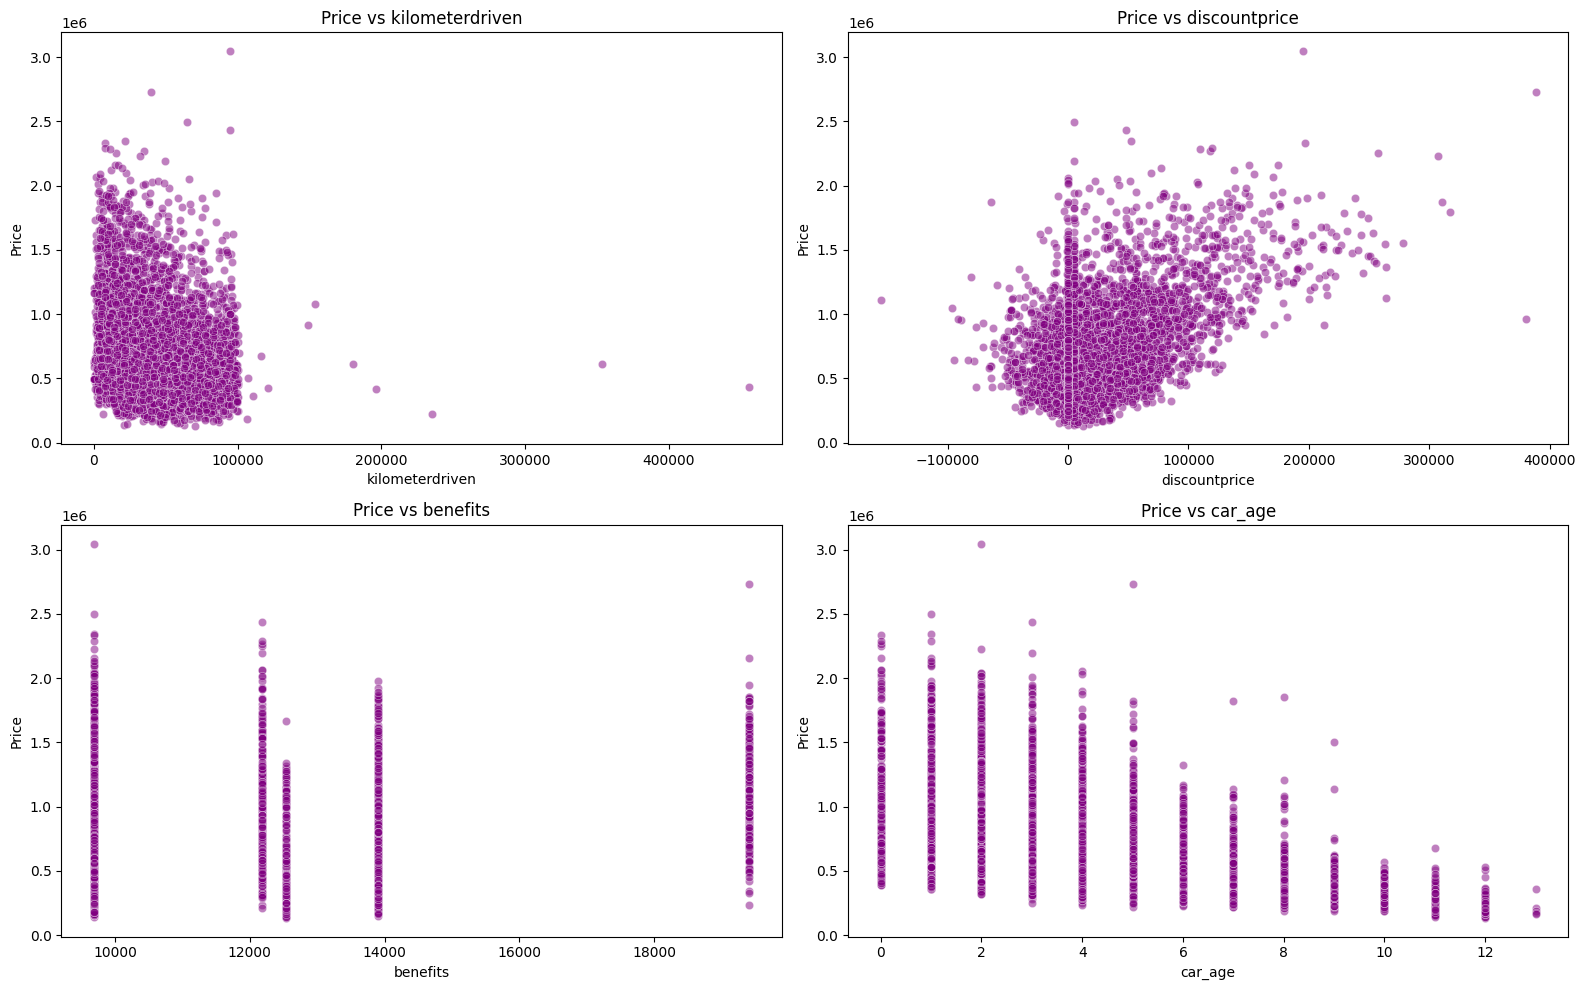

In [23]:
scatter_features = ['kilometerdriven', 'discountprice', 'benefits', 'car_age']

plt.figure(figsize=(16, 10))
for i, feature in enumerate(scatter_features, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=cars_df[feature], y=cars_df['price'], alpha=0.5, color='purple')
    plt.title(f'Price vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Price')

plt.tight_layout()
plt.show()

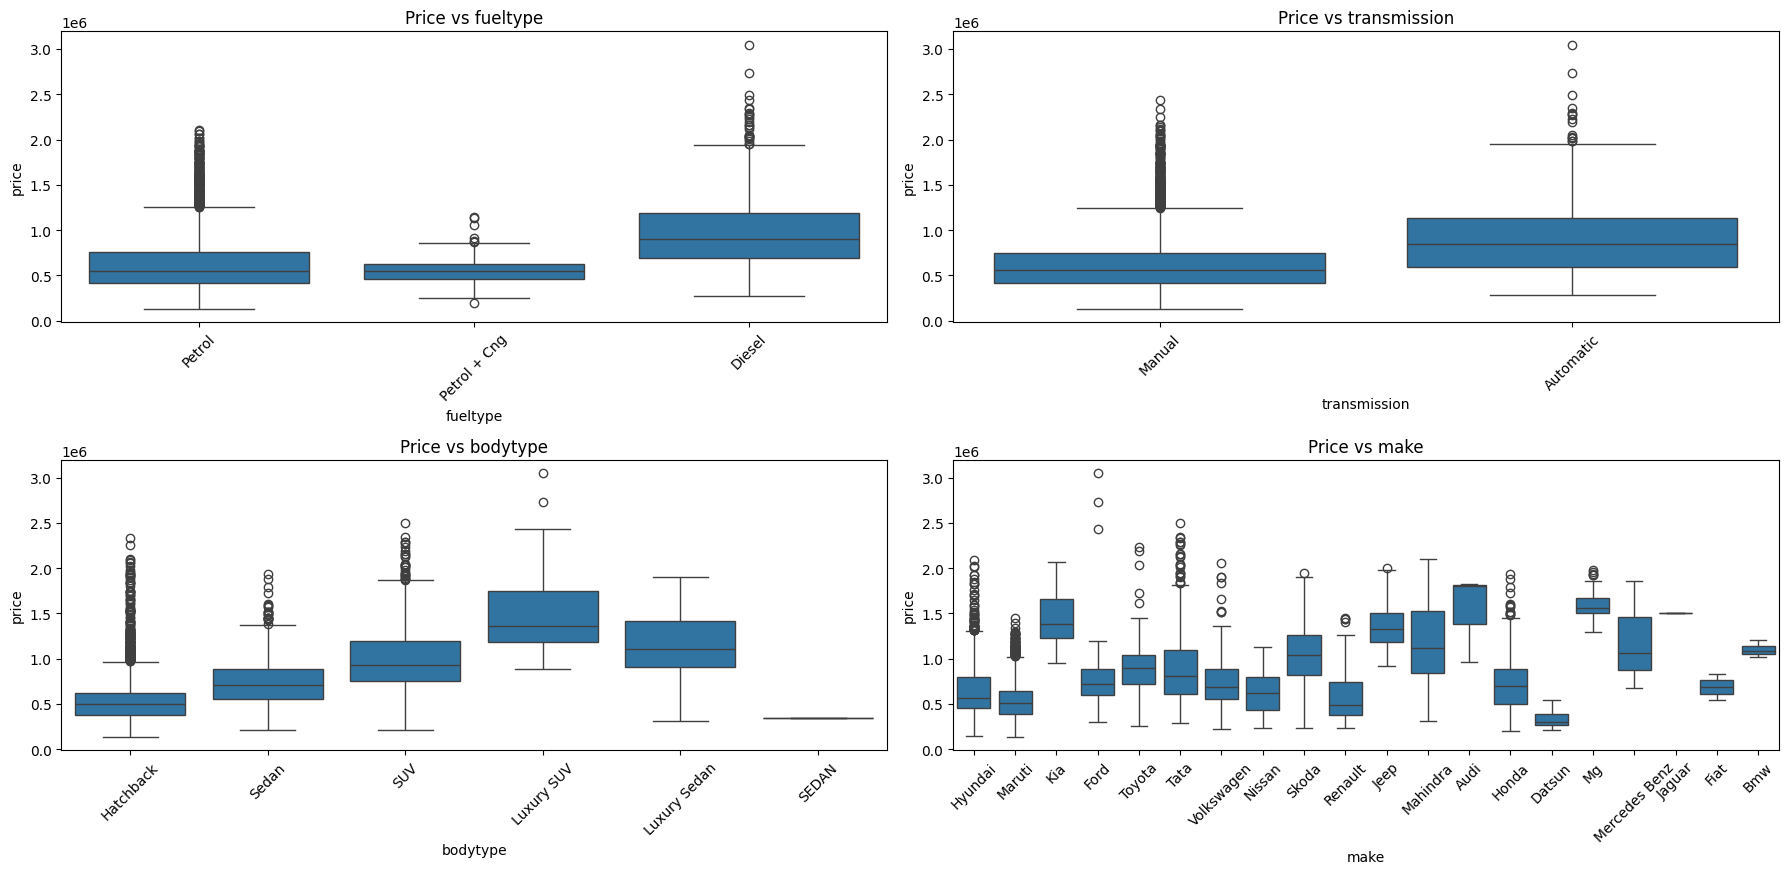

In [24]:
plt.figure(figsize=(18, 12))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=cars_df[col], y=cars_df['price'])
    plt.title(f'Price vs {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()





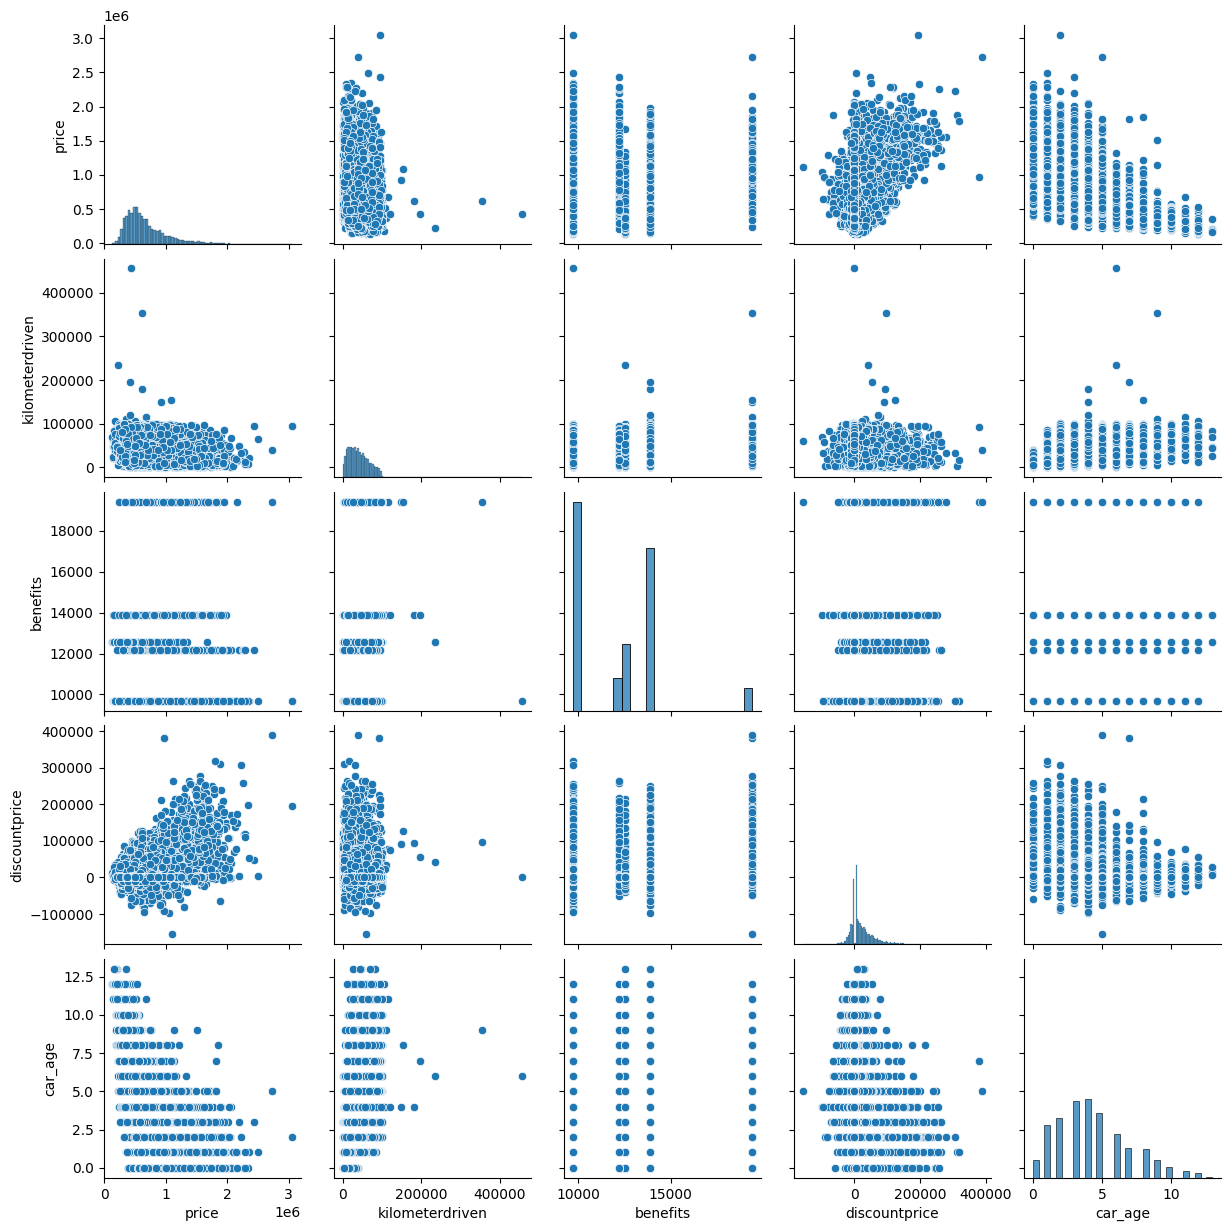

In [25]:
sns.pairplot(cars_df[['price', 'kilometerdriven', 'benefits', 'discountprice', 'car_age']])
plt.show()


Text(0.5, 1.0, 'Original Price Distribution')

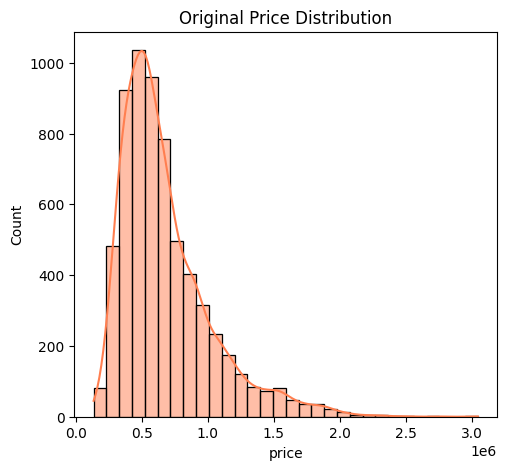

In [26]:
plt.figure(figsize=(12, 5))
# Original price distribution
plt.subplot(1, 2, 1)
sns.histplot(cars_df["price"], kde=True, bins=30, color='coral')
plt.title("Original Price Distribution")




In [27]:
# Apply natural log to the price column
log_price = np.log1p(cars_df["price"]) # log1p handles log(0) safely


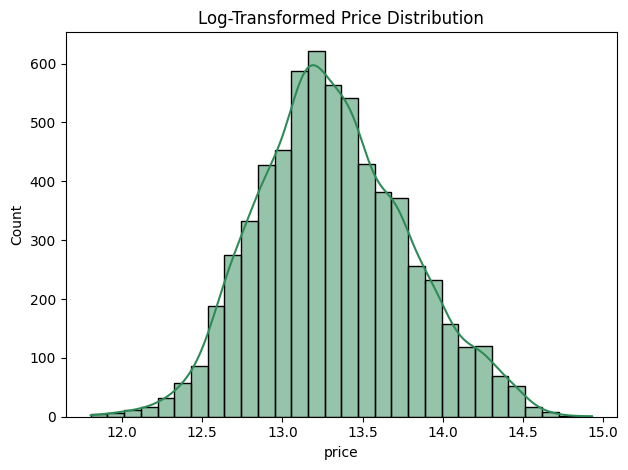

In [28]:
sns.histplot(log_price, kde=True, bins=30, color='seagreen')
plt.title("Log-Transformed Price Distribution")

plt.tight_layout()
plt.show()

# Outliers Detection

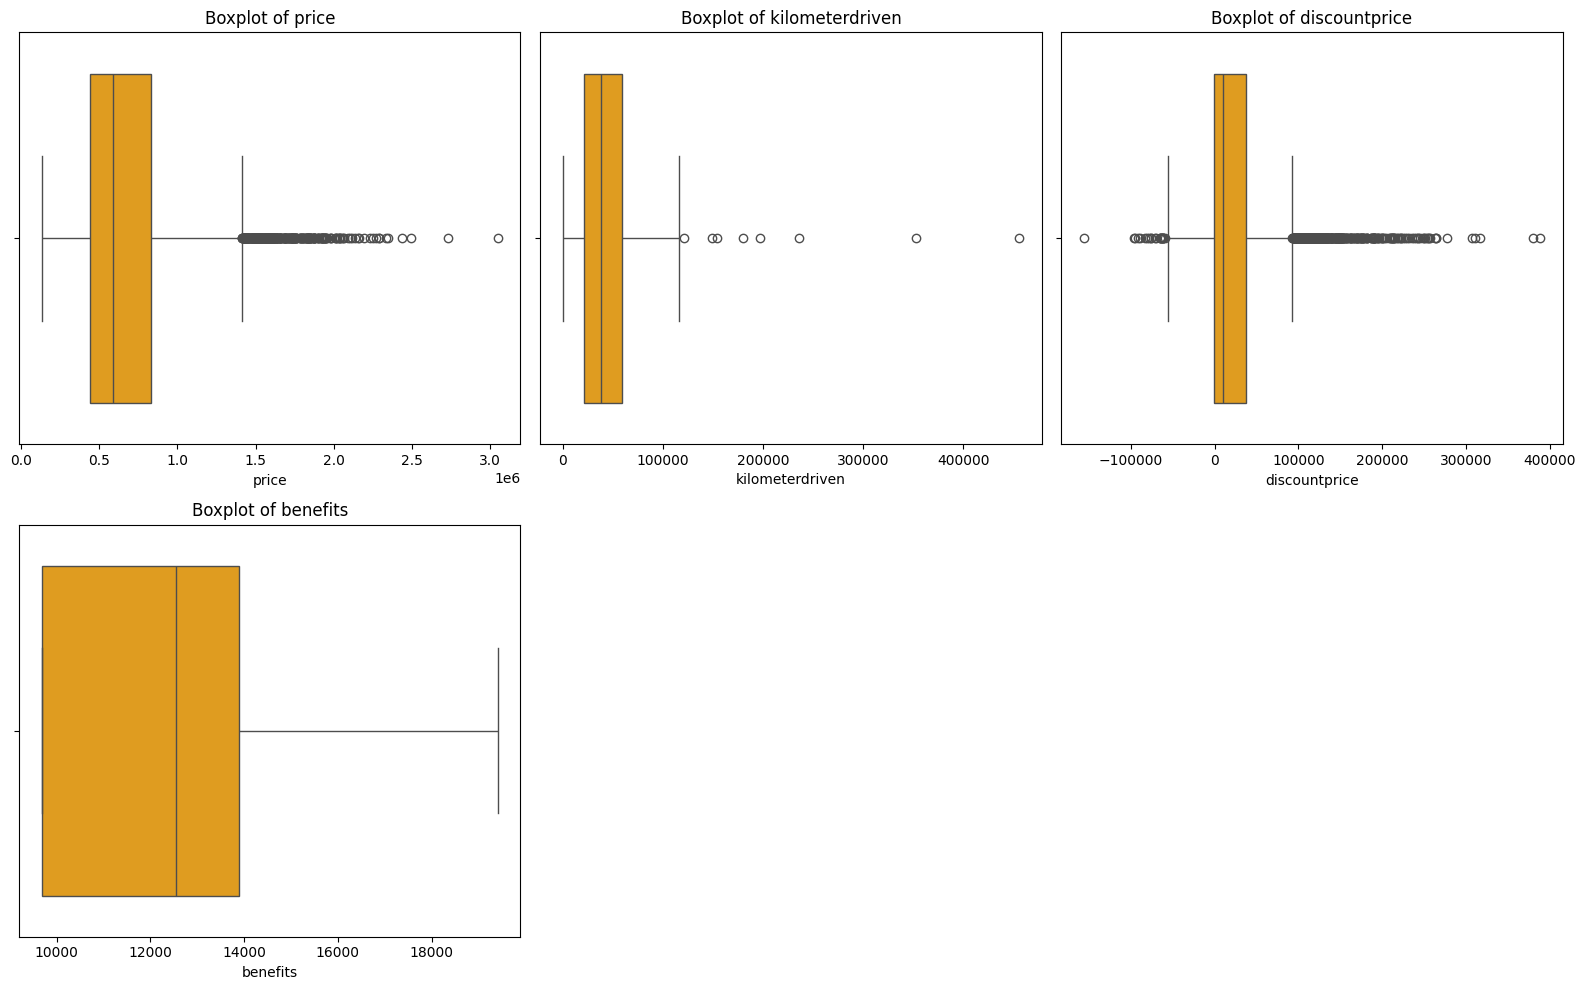

In [29]:
plt.figure(figsize=(16, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=cars_df[col], color='orange')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

In [30]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    print(f"{column}: {len(outliers)} outliers")
    return outliers

# Check for outliers in selected columns
for col in ['price', 'kilometerdriven', 'discountprice']:
    detect_outliers_iqr(cars_df, col)

price: 315 outliers
kilometerdriven: 8 outliers
discountprice: 430 outliers


In [31]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    cleaned_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    print(f"{column}: Removed {len(data) - len(cleaned_data)} outliers")
    return cleaned_data

# Remove outliers from important numeric columns
cars_df = remove_outliers_iqr(cars_df, 'price')
cars_df = remove_outliers_iqr(cars_df, 'kilometerdriven')
cars_df = remove_outliers_iqr(cars_df, 'discountprice')


price: Removed 315 outliers
kilometerdriven: Removed 8 outliers
discountprice: Removed 344 outliers


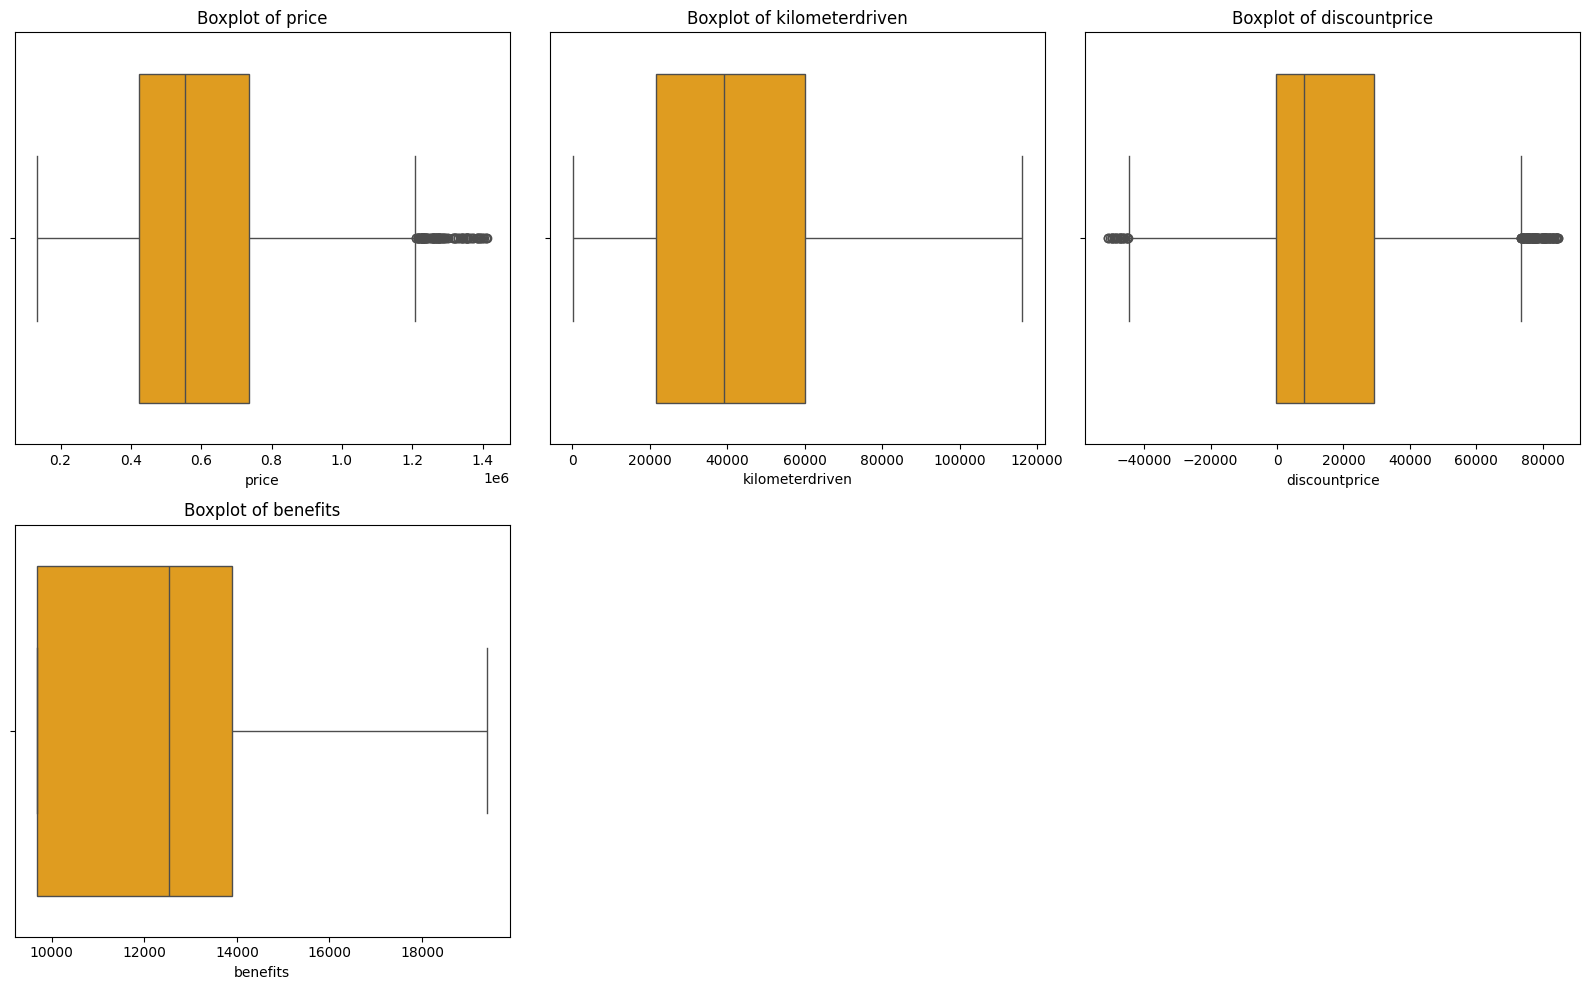

In [32]:
plt.figure(figsize=(16, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=cars_df[col], color='orange')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

Based on exploratory data analysis, the following features were identified as most important for predicting car price:

car_age, kilometerdriven, fueltype, transmission, bodytype, discountprice, make

In [33]:
columns_to_drop = [
    'name', 'url', 'createdDate', 'storename',
    'registrationcity', 'registrationstate',
]
cars_df = cars_df.drop(columns=columns_to_drop)

# Check final column list
print("Remaining columns:\n", cars_df.columns)

Remaining columns:
 Index(['make', 'model', 'city', 'year', 'fueltype', 'kilometerdriven',
       'ownernumber', 'transmission', 'bodytype', 'isc24assured', 'benefits',
       'discountprice', 'price', 'car_age'],
      dtype='object')


# Encoding

Converting categorical Columns into Numeric Is called encoding

In [34]:
cars_df

,make,model,city,year,fueltype,kilometerdriven,ownernumber,transmission,bodytype,isc24assured,benefits,discountprice,price,car_age
0,Hyundai,Elite I20,Kochi,2017,Petrol,35939,2,Manual,Hatchback,False,13898,47399,607000,5
1,Maruti,Alto 800,Mumbai,2016,Petrol + Cng,6180,1,Manual,Hatchback,False,12542,2099,326000,6
2,Maruti,Dzire,Lucknow,2019,Petrol + Cng,46808,1,Manual,Sedan,False,13898,26000,640000,3
4,Maruti,Ertiga,Kolkata,2017,Petrol,53056,1,Manual,SUV,False,13898,22800,676000,5
5,Ford,Ecosport,Pune,2014,Petrol,85905,1,Manual,SUV,False,13898,13100,468000,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6432,Mahindra,Xuv500,Hyderabad,2013,Diesel,74570,2,Manual,SUV,False,9688,0,744000,9
6433,Renault,Kwid,Chandigarh,2017,Petrol,39981,2,Manual,Hatchback,False,12542,0,248000,5
6434,Hyundai,I10,Hyderabad,2014,Petrol,61249,1,Manual,Hatchback,False,13898,0,351000,8
6435,Maruti,Swift Dzire,Hyderabad,2014,Petrol,48081,1,Manual,Sedan,False,13898,0,494000,8


In [35]:
from sklearn.preprocessing import LabelEncoder
label_cols = ['make', 'model', 'city', 'fueltype', 'transmission', 'bodytype']
le = LabelEncoder()
for col in label_cols:
    cars_df[col] = le.fit_transform(cars_df[col])


In [36]:
cars_df

,make,model,city,year,fueltype,kilometerdriven,ownernumber,transmission,bodytype,isc24assured,benefits,discountprice,price,car_age
0,4,33,17,2017,1,35939,2,1,0,False,13898,47399,607000,5
1,8,4,23,2016,2,6180,1,1,0,False,12542,2099,326000,6
2,8,30,19,2019,2,46808,1,1,5,False,13898,26000,640000,3
4,8,35,18,2017,1,53056,1,1,4,False,13898,22800,676000,5
5,2,31,33,2014,1,85905,1,1,4,False,13898,13100,468000,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6432,7,111,13,2013,0,74570,2,1,4,False,9688,0,744000,9
6433,12,60,3,2017,1,39981,2,1,0,False,12542,0,248000,5
6434,4,49,13,2014,1,61249,1,1,0,False,13898,0,351000,8
6435,8,88,13,2014,1,48081,1,1,5,False,13898,0,494000,8


In [37]:
cars_df['bodytype'].value_counts()

,count
bodytype,
0,3803
4,970
5,940
2,27
1,14
3,1


In [38]:
cars_df['transmission'].value_counts()

,count
transmission,
1,4969
0,786


In [39]:
cars_df['fueltype'].value_counts()

,count
fueltype,
1,4655
0,710
2,390


# Standardization

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_cars_df = scaler.fit_transform(cars_df)

In [41]:
scaled_cars_df

array([[-0.86484463, -0.54446562,  0.11651442, ...,  1.32214718,
         0.01510761,  0.16293913],
       [ 0.30200119, -1.40885173,  0.63477318, ..., -0.51271616,
        -1.14781981,  0.53847565],
       [ 0.30200119, -0.63388487,  0.28926734, ...,  0.4553869 ,
         0.15167916, -0.58813391],
       ...,
       [-0.86484463, -0.06756294, -0.22899143, ..., -0.59773555,
        -1.04435652,  1.28954869],
       [ 0.30200119,  1.09488735, -0.22899143, ..., -0.59773555,
        -0.45254648,  1.28954869],
       [ 1.46884702,  0.26030765, -0.22899143, ..., -0.59773555,
        -0.96158588, -0.58813391]])

In [42]:
from sklearn.model_selection import train_test_split

X = cars_df.drop('price', axis=1)
y = cars_df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (4604, 13)
X_test shape: (1151, 13)
y_train shape: (4604,)
y_test shape: (1151,)


In [43]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

In [44]:
lr_model = LinearRegression()
ridge_model = Ridge()
lasso_model = Lasso()
rf_model = RandomForestRegressor(random_state=42)
gb_model = GradientBoostingRegressor(random_state=42)
dt_model = DecisionTreeRegressor(random_state=42)
xgb_model = XGBRegressor(random_state=42)



lr_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [45]:
from sklearn.metrics import mean_squared_error, r2_score
evaluation_results = {}

In [46]:
models = {
    'Linear Regression': lr_model,
    'Ridge': ridge_model,
    'Lasso': lasso_model,
    'Random Forest': rf_model,
    'Gradient Boosting': gb_model,
    'Decision Tree': dt_model,
    'XGBoost': xgb_model,

}

for name, model in models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    evaluation_results[name] = {'MSE': mse, 'RMSE': rmse, 'R-squared': r2}

for name, metrics in evaluation_results.items():
    print(f"Model: {name}")
    print(f"  MSE: {metrics['MSE']:.2f}")
    print(f"  RMSE: {metrics['RMSE']:.2f}")
    print(f"  R-squared: {metrics['R-squared']:.2f}")
    print("-" * 20)

Model: Linear Regression
  MSE: 25091184908.55
  RMSE: 158401.97
  R-squared: 0.58
--------------------
Model: Ridge
  MSE: 25079086079.86
  RMSE: 158363.78
  R-squared: 0.58
--------------------
Model: Lasso
  MSE: 25080015792.67
  RMSE: 158366.71
  R-squared: 0.58
--------------------
Model: Random Forest
  MSE: 6661153211.42
  RMSE: 81615.89
  R-squared: 0.89
--------------------
Model: Gradient Boosting
  MSE: 8986205993.27
  RMSE: 94795.60
  R-squared: 0.85
--------------------
Model: Decision Tree
  MSE: 12589790739.49
  RMSE: 112204.24
  R-squared: 0.79
--------------------
Model: XGBoost
  MSE: 5016969728.00
  RMSE: 70830.57
  R-squared: 0.92
--------------------


#Summary


- Model Evaluation Report

This report summarizes the performance of seven machine learning models on a regression task. The models evaluated include Linear Regression, Ridge, Lasso, Random Forest, Gradient Boosting, Decision Tree, and XGBoost.

- Key Findings

 XGBoost emerged as the top-performing model, achieving the lowest RMSE (70,830.57) and highest R-squared (0.92).

 Random Forest and Gradient Boosting also demonstrated strong performance, with R-squared values above 0.85.

 Linear Regression, Ridge, and Lasso showed similar performance, with R-squared values around 0.58.

- Recommendations

 XGBoost is recommended for deployment due to its superior performance.

 Further hyperparameter tuning and feature engineering may be explored to improve model performance.

*Conclusion

The evaluation results indicate that XGBoost is the most suitable model for this regression task, offering a strong balance between accuracy and generalizability.


In [47]:
import joblib

joblib.dump(xgb_model, 'xgb_regressor_model.joblib')

['xgb_regressor_model.joblib']

In [48]:
from xgboost import XGBRegressor
import joblib

xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

joblib.dump(xgb_model, 'xgb_regressor_model.joblib')

['xgb_regressor_model.joblib']

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import joblib
from sklearn.preprocessing import LabelEncoder
import numpy as np

cars_df = pd.read_csv("/content/cars24_20221210.csv")

# Data Cleaning and Feature Engineering (as performed in previous cells)
cars_df["transmission"] = cars_df["transmission"].fillna(cars_df["transmission"].mode()[0])
cars_df["bodytype"]=cars_df["bodytype"].fillna(cars_df["bodytype"].mode()[0])
cars_df = cars_df.drop_duplicates()
cars_df["createdDate"] = pd.to_datetime(cars_df["createdDate"], errors='coerce')
cars_df["car_age"] = cars_df["createdDate"].dt.year - cars_df["year"]

# Remove outliers (as performed in previous cells)
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    cleaned_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return cleaned_data

cars_df = remove_outliers_iqr(cars_df, 'price')
cars_df = remove_outliers_iqr(cars_df, 'kilometerdriven')
cars_df = remove_outliers_iqr(cars_df, 'discountprice')

# Drop irrelevant columns (as performed in previous cells)
columns_to_drop = [
    'name', 'url', 'createdDate', 'storename',
    'registrationcity', 'registrationstate',
]
cars_df = cars_df.drop(columns=columns_to_drop)

# Encoding (as performed in previous cells)
label_cols = ['make', 'model', 'city', 'fueltype', 'transmission', 'bodytype']
le = LabelEncoder()
for col in label_cols:
    cars_df[col] = le.fit_transform(cars_df[col])


# Split data
X = cars_df.drop('price', axis=1)
y = cars_df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost model
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

# Save the model
joblib.dump(xgb_model, 'xgb_regressor_model.joblib')

['xgb_regressor_model.joblib']

In [51]:
import joblib

joblib.dump(xgb_model, 'xgb_regressor_model.joblib')

['xgb_regressor_model.joblib']

In [58]:
!pip -q install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 42.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.0 MB/s eta 0:00:00


In [59]:
%%writefile app.py
import streamlit as st
import joblib
import pandas as pd
import numpy as np
from datetime import datetime

# Load the saved model
try:
    model = joblib.load('xgb_regressor_model.joblib')
except FileNotFoundError:
    st.error("Model file not found. Please ensure 'xgb_regressor_model.joblib' is in the same directory.")
    st.stop()

st.title('Car Price Prediction App')

st.sidebar.header('Input Car Features')

# Define input fields
# These mappings should ideally be saved during training, but for this task, we'll create them manually based on EDA
# Note: These mappings are simplified and based on the value_counts observed in the notebook.
# A robust solution would save the label encoders.
make_mapping = {
    'Maruti': 8, 'Hyundai': 4, 'Honda': 3, 'Renault': 12, 'Tata': 15, 'Ford': 2,
    'Mahindra': 7, 'Volkswagen': 17, 'Kia': 5, 'Toyota': 16, 'Skoda': 14, 'Mg': 9,
    'Datsun': 1, 'Jeep': 6, 'Nissan': 10, 'Audi': 0, 'Mercedes Benz': 9, 'Bmw': 0,
    'Fiat': 2, 'Jaguar': 5
} # Example mapping, replace with actual mappings from training
model_mapping = {
    'Grand I10': 36, 'Swift': 87, 'Baleno': 10, 'Wagon R 1.0': 114, 'Elite I20': 32,
    'Alto 800': 3, 'Dzire': 29, 'Ertiga': 34, 'Ecosport': 30, 'Kwid': 59, 'Xuv500': 110,
    'I10': 48, 'Swift Dzire': 87, 'Sunny': 89, '5 Series': 0, 'Figo': 2, 'X3': 108,
    'A6': 0 # Example mapping, replace with actual mappings
} # Example mapping, replace with actual mappings from training
city_mapping = {
    'Kochi': 17, 'Mumbai': 23, 'Lucknow': 19, 'Kolkata': 18, 'Pune': 33, 'Hyderabad': 13,
    'Chandigarh': 3
} # Example mapping, replace with actual mappings from training
fueltype_mapping = {'Petrol': 1, 'Diesel': 0, 'Petrol + Cng': 2}
transmission_mapping = {'Manual': 1, 'Automatic': 0}
bodytype_mapping = {'Hatchback': 0, 'SUV': 4, 'Sedan': 5, 'Luxury SUV': 2, 'Luxury Sedan': 1, 'SEDAN': 3}


make = st.sidebar.selectbox('Make', list(make_mapping.keys()))
model_name = st.sidebar.selectbox('Model', list(model_mapping.keys()))
city = st.sidebar.selectbox('City', list(city_mapping.keys()))
year = st.sidebar.number_input('Year', min_value=2008, max_value=datetime.now().year, value=2018)
fueltype = st.sidebar.selectbox('Fuel Type', list(fueltype_mapping.keys()))
kilometerdriven = st.sidebar.number_input('Kilometers Driven', min_value=0, value=50000)
ownernumber = st.sidebar.selectbox('Owner Number', [1, 2, 3])
transmission = st.sidebar.selectbox('Transmission', list(transmission_mapping.keys()))
bodytype = st.sidebar.selectbox('Body Type', list(bodytype_mapping.keys()))
isc24assured = st.sidebar.checkbox('Is Cars24 Assured?')
benefits = st.sidebar.number_input('Benefits', min_value=0, value=10000)
discountprice = st.sidebar.number_input('Discount Price', value=0)

# Calculate car_age
current_year = datetime.now().year
car_age = current_year - year

# Encode categorical features
encoded_make = make_mapping.get(make, -1) # Use .get for safety
encoded_model = model_mapping.get(model_name, -1)
encoded_city = city_mapping.get(city, -1)
encoded_fueltype = fueltype_mapping[fueltype]
encoded_transmission = transmission_mapping[transmission]
encoded_bodytype = bodytype_mapping[bodytype]


if st.sidebar.button('Predict Price'):
    # Create a DataFrame for prediction
    input_data = pd.DataFrame([[
        encoded_make, encoded_model, encoded_city, year, encoded_fueltype,
        kilometerdriven, ownernumber, encoded_transmission, encoded_bodytype,
        isc24assured, benefits, discountprice, car_age
    ]], columns=['make', 'model', 'city', 'year', 'fueltype', 'kilometerdriven',
                 'ownernumber', 'transmission', 'bodytype', 'isc24assured', 'benefits',
                 'discountprice', 'car_age'])

    # Ensure the column order is exactly the same as during training
    # This is crucial for the model to work correctly
    # You might need to manually verify and adjust this order based on your training data
    # For this example, we assume the order in the input_data DataFrame is correct.

    # Predict the price
    predicted_price = model.predict(input_data)[0]

    st.subheader('Predicted Car Price')
    st.success(f'The estimated price is: ₹{predicted_price:,.2f}')

Overwriting app.py


In [60]:
%%writefile requirements.txt
streamlit
joblib
pandas
numpy
scikit-learn
xgboost

Overwriting requirements.txt


In [66]:
!wget -q -O - ipv4.icanhazip.com

34.139.117.103


In [67]:
!streamlit run app.py & npx localtunnel --port 8501

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋

⠙⠹⠸your url is: https://tiny-adults-jam.loca.lt

  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.139.117.103:8501

  Stopping...
^C
